# Convolutional Neural Network

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
import sys

sys.path.append('./neural-networks/')

from nn.neural_network import NeuralNetwork
from layer.dense_layer import Dense
from layer.cnn.conv2D import Conv2D
from operation.activation.tanh import Tanh
from operation.activation.linear import Linear
from loss.softmax_cross_entropy import SoftmaxCrossEntropy
from trainer.trainer import Trainer
from optimizer.sgd_momentum import SGDMomentum

## Data

### Download MNIST dataset

In [2]:
import gzip
import pickle
import numpy as np
from urllib import request

In [3]:
filename = [
    ["training_images","train-images-idx3-ubyte.gz"],
    ["test_images","t10k-images-idx3-ubyte.gz"],
    ["training_labels","train-labels-idx1-ubyte.gz"],
    ["test_labels","t10k-labels-idx1-ubyte.gz"]
]

In [4]:
def download_mnist():
    base_url = "http://yann.lecun.com/exdb/mnist/"
    for name in filename:
        print("Downloading "+name[1]+"...")
        request.urlretrieve(base_url+name[1], name[1])
    print("Download complete.")

In [5]:
def save_mnist():
    mnist = {}
    for name in filename[:2]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)
    for name in filename[-2:]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=8)
    with open("mnist.pkl", 'wb') as f:
        pickle.dump(mnist,f)
    print("Save complete.")

In [6]:
download_mnist()

Download complete.


In [7]:
save_mnist()

Save complete.


### Load Data

In [9]:
def load():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]

In [10]:
X_train, y_train, X_test, y_test = load()

In [11]:
X_train, X_test = X_train - np.mean(X_train), X_test - np.mean(X_train)
X_train, X_test = X_train / np.std(X_train), X_test / np.std(X_train)

In [12]:
X_train_conv, X_test_conv = X_train.reshape(-1, 1, 28, 28), X_test.reshape(-1, 1, 28, 28)

In [13]:
num_labels = len(y_train)
train_labels = np.zeros((num_labels, 10))
for i in range(num_labels):
    train_labels[i][y_train[i]] = 1

num_labels = len(y_test)
test_labels = np.zeros((num_labels, 10))
for i in range(num_labels):
    test_labels[i][y_test[i]] = 1

### Plot Some Images

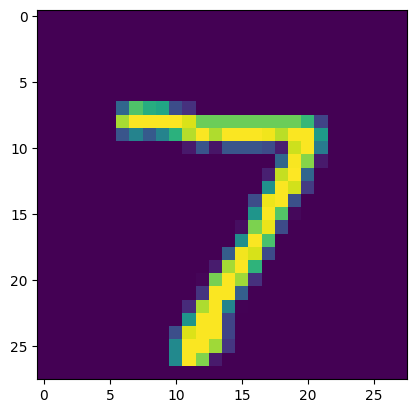

In [22]:
plt.imshow(X_test_conv[0][0])

## Model Evaluation

In [14]:
def calc_accuracy_model(model, test_set):
    return print(f'''The model validation accuracy is: 
    {np.equal(np.argmax(model.forward(test_set, inference=True), axis=1), y_test).sum() * 100.0 / test_set.shape[0]:.2f}%''')

## Declare CNN

In [23]:
model = NeuralNetwork(
    layers=[
        Conv2D(out_channels=16,
               param_size=5,
               dropout=0.8,
               weight_init='glorot',
               flatten=True,
               activation=Tanh()),
        Dense(neurons=10,
              activation=Linear())],
    loss=SoftmaxCrossEntropy(),
    seed=20190402
)

In [24]:
trainer = Trainer(model, SGDMomentum(lr = 0.1, momentum=0.9))
trainer.fit(X_train_conv, train_labels, X_test_conv, test_labels,
            epochs = 1,
            eval_every = 1,
            seed=20190402,
            batch_size=60,
            conv_testing=True)

batch 0 loss 31.191501893742405
batch 10 loss 14.150390490531656
batch 20 loss 8.507022903630483
batch 30 loss 9.816084750056138
batch 40 loss 2.7068954259156857
batch 50 loss 5.039109427982678
batch 60 loss 3.841380681251465
batch 70 loss 8.467400063433397
batch 80 loss 5.359037870675346
batch 90 loss 2.4433178695926823
batch 100 loss 3.933895891802764
Validation accuracy after 100 batches is 86.14%
batch 110 loss 9.693444836909464
batch 120 loss 7.8785328853403
batch 130 loss 5.6809746405857675
batch 140 loss 5.891017182529667
batch 150 loss 7.914660403003567
batch 160 loss 5.173220830294975
batch 170 loss 5.414313355901474
batch 180 loss 6.830289069989724
batch 190 loss 5.232579024018652
batch 200 loss 5.896150349672265
Validation accuracy after 200 batches is 84.60%
batch 210 loss 4.144653182746855
batch 220 loss 6.040723950983338
batch 230 loss 5.010925620942249
batch 240 loss 3.453963856522151
batch 250 loss 3.125592235338534
batch 260 loss 7.203666760229589
batch 270 loss 4.8274

In [25]:
calc_accuracy_model(model, X_test_conv)

The model validation accuracy is: 
    91.41%


## Predict on New Data

In [26]:
test_image = X_test_conv[0][0]

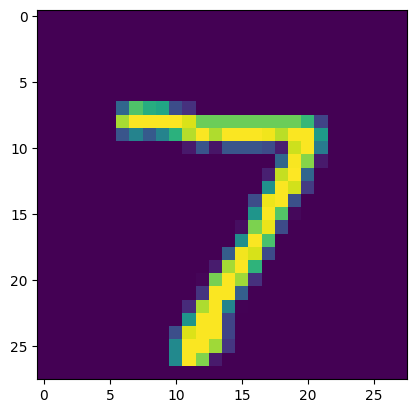

In [27]:
plt.imshow(X_test_conv[0][0])

In [28]:
test_image = np.expand_dims(X_test_conv[0], 0)
prediction = model.forward(test_image, inference=True)
np.argmax(prediction)

7